# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

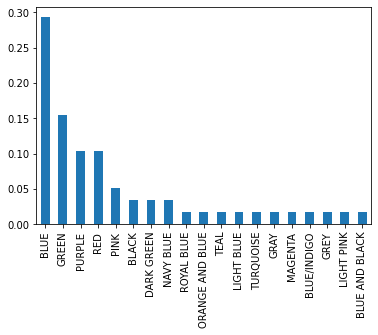

In [3]:
import pandas as pd
data_dir = "/content/"
df_data1B = pd.read_csv(data_dir + "DATA1B.csv")
colors = df_data1B["What is your favorite color?"].str.replace("Navy ","navy blue").str.replace("Forest Green","dark green").str.upper()
colors.value_counts(normalize=True).plot.bar()

Most people in DATA 301 like blue. Some people submitted more than one color, and some variations (eg dark green) were combined)





## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

How many siblings do you have?,0,1,2,3,5
Are you in SLO,,,,,
no,0.8,0.36,0.35,0.6,1.0
yes,0.2,0.64,0.65,0.4,0.0


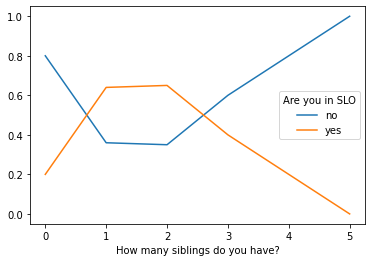

In [4]:
siblings = df_data1B["How many siblings do you have?"]
df_data1B["Are you in SLO"] = df_data1B["Where are you living this quarter?"].map({
    'Off Campus, outside of SLO': 'no',
    'Off Campus, but in SLO': 'yes',
    'On-Campus housing': 'yes'

})
SLO = df_data1B["Are you in SLO"]

joint_campus_sibling = pd.crosstab(SLO, siblings,normalize = True)
siblings = joint_campus_sibling.sum(axis = 0)
cond_campus_sibling = joint_campus_sibling.divide(siblings, axis = 1)
cond_campus_sibling.T.plot()
cond_campus_sibling

The chances of a student living in slo given that they have a sibling...

If a student lives in slo, then its likely that they have 1 or 2 siblings. 
If someone doesn't live in slo, then its more likely that they have 0 or 2+ siblings.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

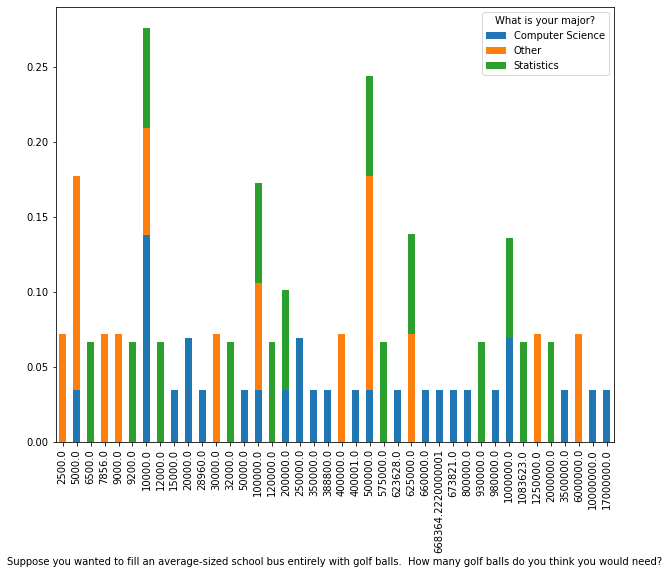

In [16]:
answers = df_data1B["Answers"] = df_data1B["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"]
major = df_data1B["What is your major?"]

joint_answers_major = pd.crosstab(answers, major, normalize = True)
allMaj = joint_answers_major.sum(axis = 0)
cond_answers_major = joint_answers_major.divide(allMaj, axis = 1)
cond_answers_major.plot.bar(stacked = True,figsize = (10,8))

I tried to see if there was a correlation between the answer provided, given the student's major. I don't think there is any realtion but the interesting part is (assuming the Quora answer of 1,000,000 is the most accurate), most students weren't in that range but a high number of CS & STATS were right. 

**TYPE YOUR WRITTEN EXPLANATION HERE.**

## Question 4

Whats the probability that a student enjoys video games given they are a CS major?
P(Gaming|CS)

Whats the probability that a student is a CS major given that they enjoy video games?
P(CS|Gaming)

In [ ]:
games = df_data1B["Do you enjoy video games?"]
df_data1B["CS"] = df_data1B["What is your major?"].map({
    'Computer Science': 'yes'

})
df_data1B["CS"].fillna("no", inplace = True)
CS = df_data1B["CS"]

joint_gaming_cs = pd.crosstab(games, CS, normalize = True)
allGames = joint_gaming_cs.sum(axis = 1)
allCS = joint_gaming_cs.sum(axis = 0)
cond_gaming_cs = joint_gaming_cs.divide(allCS, axis = 1)
cond_gaming_cs

CS,no,yes
Do you enjoy video games?,,
No,0.310345,0.137931
Yes,0.689655,0.862069


In [ ]:
cond_CS_gaming = joint_gaming_cs.divide(allGames, axis = 0)
cond_CS_gaming

CS,no,yes
Do you enjoy video games?,,
No,0.692308,0.307692
Yes,0.444444,0.555556


The probability that a student likes video games given that they are a CS major are 86%

The probability that a student is a CS major given that they like video games is 56%

**Bonus**

Compare the artistic rates of majors. Which group appears to consider themselves more artistic?

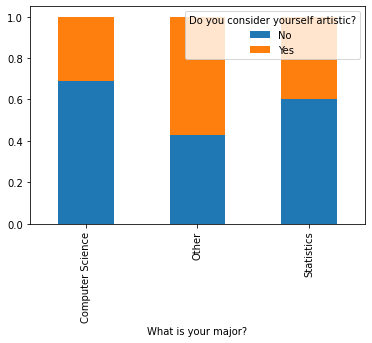

In [18]:
joint_major_artist = pd.crosstab(df_data1B["What is your major?"], df_data1B["Do you consider yourself artistic?"], 
                                    normalize=True)
major = joint_major_artist.sum(axis=1)
cond_major_artist = joint_major_artist.divide(major, axis=0)
cond_major_artist.plot.bar(stacked=True)

For both computer science and statistics, the majority doesn't consider themselves artistic, but for other, the majority considers themselves artistic.